In [1]:
#!pip install python-dateutil

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import sqlalchemy as sql

In [4]:
import datetime as dt

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import sys
import json
import csv
import datetime
from datetime import timedelta
from datetime import datetime
from dateutil.parser import parse
from sqlalchemy import func

# Output File (CSV)
output_data_file = "climate_yr.csv"

# Reflect Tables into SQLAlchemy ORM

In [6]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [7]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [9]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

## Exploratory Climate Analysis

In [12]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

In [13]:
# Calculate the date 1 year ago from the last data point in the database
# Query for last date
end_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
#print(end_date)

# Extracting just the last date from the returned list 'end_date'
last_date = end_date[0]
#print(last_date)

# Converting string to datetime format
rf = datetime.strptime(last_date, '%Y-%m-%d').date()
#print(rf)

# Subtracting 365 days
rng_start_date = rf - timedelta(days=365)
#print(rng_start_date)

sd = str(rng_start_date)

#Calculating early date
nd = rf - timedelta(days=365)
#print(nd)

# Exploratory Climate Analysis

In [14]:
# Perform a query to retrieve the date and precipitation scores
# Save the query results as a Pandas Dataframe and set the index to the date column
rain = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= nd).filter(Measurement.date <= rf)
rain_df = pd.DataFrame(rain, columns=['date','prcp'])
pre_sort_df=rain_df.copy() # Pre sort version needed to get matching numbers to example
rain_df = rain_df.sort_values(by=['date'])
rain_df.set_index('date')
rain_df = rain_df

<Figure size 360x288 with 0 Axes>

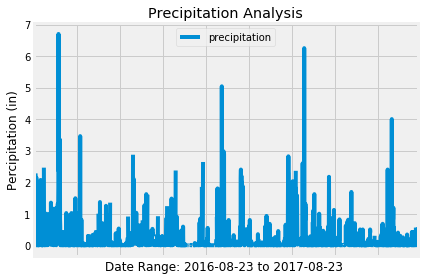

In [15]:
# Plotting background checks data
##ax1 = prcp_df.plot.line(x='date', y='prcp')
fig1 = plt.figure(figsize=(5,4))
rain_df.plot('date', 'prcp')
plt.grid(True)

plt.ylabel("Percipitation (in)", size=12)
plt.title("Precipitation Analysis")
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.xlabel('Date Range: ' + sd + ' to ' + last_date + ' ', size=12)
#plt.title('City Latitude vs. Max Temperature (' + time.strftime("%m/%d/%y") + ')')
plt.legend(['precipitation'],loc = 'upper center')
plt.tight_layout()
plt.savefig('PrecipitationAnalysis.png', bbox_inches="tight")
plt.show()

In [16]:
# Use Pandas to calcualte the summary statistics for the precipitation data
pre_sort_df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [17]:
# Design a query to show how many stations are available in this dataset?
tot_sta = session.query(Station).count()
print(tot_sta)

9


In [18]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
most_act_sta = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
                    order_by(func.count().desc()).all()

most_act_sta

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active_station = most_act_sta[0][0]

most_active_temps = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs)).filter(Measurement.station == most_active_station).all()

# most_active_temps

In [20]:
# Choose the station with the highest number of temperature observations.
most_temp_obs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).first()

most_temp_obs = most_temp_obs[0]

# most_temp_obs

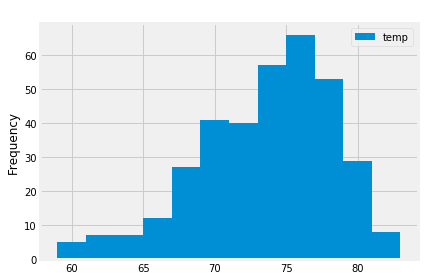

In [21]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
t_obs = session.query(Measurement.tobs).filter(Measurement.date >= sd).filter(Measurement.station == most_temp_obs).all()

t_obs_df = pd.DataFrame(t_obs, columns=['Temp'])

# ...and plot the results as a histogram

hist = t_obs_df.hist(bins=12)
plt.title(' ')
plt.legend(['temp'],loc = 'upper right')
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig('Temp_Histogram.png', bbox_inches="tight")
plt.show()

In [22]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [23]:
# print(last_date)
# print(sd)

In [24]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip_days = calc_temps('2016-10-03', '2016-10-15')
# trip_days[0]


In [25]:
tt_df = pd.DataFrame(trip_days, columns=['t_min', 't_avg', 't_max'])
# tt_df

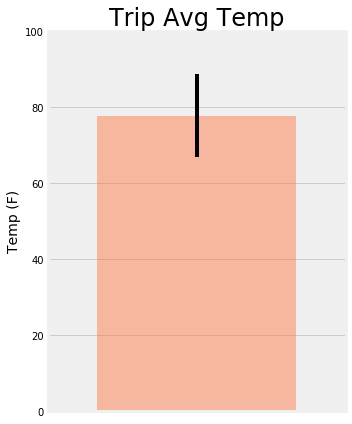

In [26]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

tt_df.plot.bar(y='t_avg',yerr=(tt_df['t_max']-tt_df['t_min']), color='coral', alpha=0.5, figsize=(5,6),width=1)
plt.grid(True)
plt.ylabel("Temp (F)", size=14)
plt.title("Trip Avg Temp", size=24)
plt.yticks(np.arange(0,101,20))
plt.xticks(np.arange(1, 1.0))
plt.gca().legend_.remove()
plt.tight_layout()
plt.savefig('Trip_Avg_Temp.png', bbox_inches="tight")
plt.show()

In [27]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

def rain_per_sta(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    fields = [Measurement.station,Station.name,Station.latitude,Station.longitude,Station.elevation]
    
    
    return session.query(*fields, func.sum(Measurement.prcp)).\
        filter(Measurement.station==Station.station).filter(Measurement.date >= start_date).\
        filter(Measurement.date <= end_date).group_by(Measurement.station).order_by(func.sum(Measurement.prcp).desc()).all()

# function usage example
# print(rain_per_sta('2012-02-28', '2012-03-05'))

In [28]:
print(rain_per_sta('2016-10-03', '2016-10-15'))

[('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4, 5.579999999999999), ('USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9, 0.55), ('USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6, 0.14), ('USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0, 0.11000000000000001), ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.07), ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.0), ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5, 0.0)]


## Optional Challenge Assignment

In [29]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [30]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
# Set the start and end date of the trip
# Use the start and end date to create a range of dates
# Stip off the year and save a list of %m-%d strings
# Loop through the list of %m-%d strings and calculate the normals for each date

start_date='2016-10-03'
end_date='2016-10-15'

s_d = datetime.strptime(start_date, '%Y-%m-%d').date()
e_d = datetime.strptime(end_date, '%Y-%m-%d').date()

s_dx = datetime.strftime(s_d,'%m-%d')
# s_dx
# s_d


In [31]:
# Determining the number of days to count
x_d = e_d - s_d
x_d

rng_days = x_d.days

# rng_days

In [32]:
# Creating usable list for daily_normals function and final area plot
trip_days_list = []
tdl_full_date = []
i=0
date = s_d - timedelta(days=1)
for i in range(rng_days + 1):
    date = date + timedelta(days=1)
    strip_day = datetime.strftime(date,'%m-%d')
    trip_days_list.append(strip_day)
    strip_day_full = datetime.strftime(date,'%Y-%m-%d')
    tdl_full_date.append(strip_day_full)

t_d_l = trip_days_list
# print(t_d_l)
# print(tdl_full_date)

In [33]:
# Creating lists from the data to use in df
tmin = []
tavg = []
tmax = []

d_norm = []

for day_n in t_d_l:
    da_norm = tuple(daily_normals(day_n))
    zx = da_norm[0]
    tmin.append(zx[0])
    tavg.append(zx[1])
    tmax.append(zx[2])

print(tmin)
print(tavg)
print(tmax)

[66.0, 67.0, 67.0, 70.0, 68.0, 66.0, 69.0, 69.0, 69.0, 65.0, 65.0, 67.0, 67.0]
[76.73076923076923, 75.86274509803921, 76.16666666666667, 75.42, 75.6078431372549, 76.3265306122449, 76.11363636363636, 75.85416666666667, 76.57142857142857, 75.75510204081633, 75.98039215686275, 75.1923076923077, 75.63461538461539]
[84.0, 82.0, 84.0, 81.0, 81.0, 86.0, 84.0, 83.0, 84.0, 82.0, 84.0, 82.0, 82.0]


In [34]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
# Creating daily normals dataframe
df = pd.DataFrame({'date':tdl_full_date,
                   'tmin':tmin,
                   'tavg':tavg,
                   'tmax':tmax}, )
df

df.set_index('date').head()

,tmin,tavg,tmax
date,,,
2016-10-03,66.0,76.730769,84.0
2016-10-04,67.0,75.862745,82.0
2016-10-05,67.0,76.166667,84.0
2016-10-06,70.0,75.420000,81.0
2016-10-07,68.0,75.607843,81.0


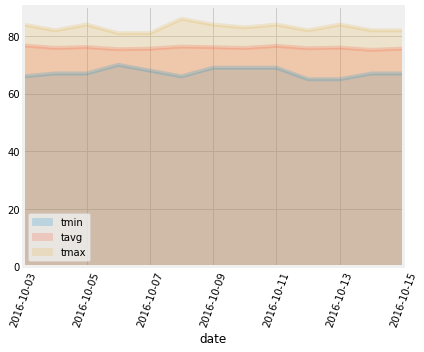

In [35]:
# Plot the daily normals as an area plot with `stacked=False`
# Plotting data with an area plot
ax = df.plot.area(stacked=False, x='date', alpha=0.2, figsize=(6,5))
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig('Daily_normals.png', bbox_inches="tight")

plt.show()